In [0]:
# Stage 1 : Data Collection
import pandas as pd
df = pd.read_csv('http://hackveda.in/sistec/Housing_Modified.csv')
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no


In [0]:
# Cleaning , Standardization , Normalization
# Convert Boolean Values into Numerical Feature
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
# It Converts Boolean Value into Numeric

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

# One Hot Encoding  --> dummy_variables
# pandas ---> get_dummies()

df_stories = pd.get_dummies(df['stories'],prefix='stories')
#df_stories

df = pd.concat([df , df_stories] , axis=1)

del df['stories']

df.head(3)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


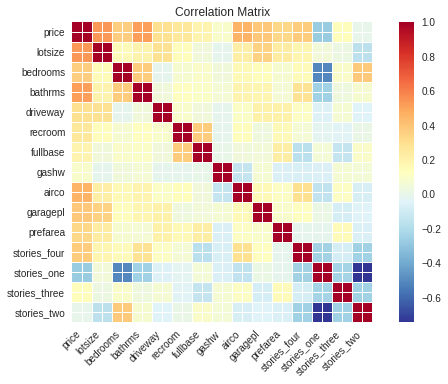

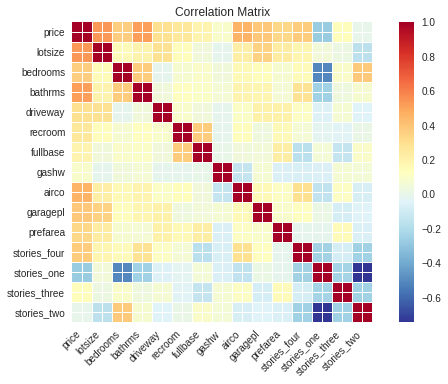

In [0]:
import statsmodels.api as sm
sm.graphics.plot_corr(df.corr(),xnames=list(df.columns))

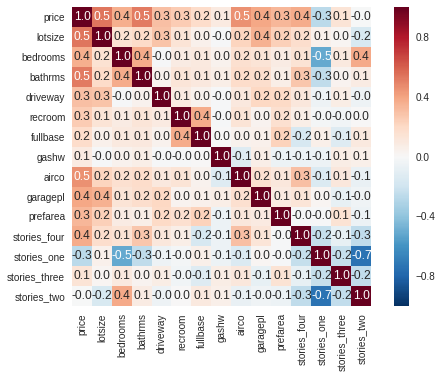

In [0]:
import seaborn as sns
# heatmap --> correlation matrix graph
sns.heatmap(df.corr() , square=True , annot= True, fmt='.1f')

In [0]:
# Create a List Of All Independent Variables
independent_variables = ['lotsize','bedrooms','bathrms',
                        'driveway' , 'recroom','fullbase',
                        'gashw','airco', 'garagepl','prefarea',
                        'stories_four','stories_one',
                        'stories_three','stories_two']

independent_variables

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [0]:
# VIF 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[independent_variables]

y = df['price']

thresh = 10 

for i in np.arange(0 , len(independent_variables)):
  vif = [variance_inflation_factor(X[independent_variables].values, ix) 
         for ix in range(X[independent_variables].shape[1])]
  maxloc = vif.index(max(vif))
  if max(vif) > thresh:
    print ("vif : ",vif)
    print ("Dropping : "+X[independent_variables].columns[maxloc] + 
          " at index : "+str(maxloc))
    del independent_variables[maxloc]
  else:
    break
    
print ('Final Independent Variables : ',independent_variables)

vif :  [1.3704738112004569, 1.578326825971881, 1.2987779728705593, 1.1648811574651847, 1.2148620093192928, 1.3369114662383517, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 4.544836339845972, 11.781465345739338, 3.943698568447546, 17.220894903652624]
Dropping : stories_two at index : 13
vif :  [9.027672411240845, 12.40877864989557, 9.374682124313615, 6.79426994395169, 1.4753724454932144, 2.055797712632684, 1.103128332756141, 1.785054332017555, 1.9607784997238857, 1.5317205065647905, 1.4546157757803124, 1.8969940907498246, 1.278600527923588]
Dropping : bedrooms at index : 1
Final Independent Variables :  ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one', 'stories_three']


In [0]:
# Testing And Training Of Dataset
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df[independent_variables]
y = df['price']

X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=.80,random_state=1)

print ("X_train", X_train.shape)
print ("X_test", X_test.shape)
print ("Y_train", y_train.shape)
print ("Y_test",y_test.shape)

X_train (436, 12)
X_test (110, 12)
Y_train (436,)
Y_test (110,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
lm = sm.OLS(y_train , X_train).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     760.6
Date:                Tue, 05 Feb 2019   Prob (F-statistic):          5.22e-278
Time:                        05:01:26   Log-Likelihood:                -4819.9
No. Observations:                 436   AIC:                             9664.
Df Residuals:                     424   BIC:                             9713.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.7699      0.388      9.708

In [0]:
independent_variables = ['lotsize','bathrms',
                        'driveway' ,'fullbase',
                        'gashw','airco', 'garagepl','prefarea',
                        'stories_four',
                        'stories_three']

X = df[independent_variables]
y = df['price']

X_train, X_test , y_train , y_test = train_test_split(X,y,train_size=.80,random_state=1)

print ("X_train", X_train.shape)
print ("X_test", X_test.shape)
print ("Y_train", y_train.shape)
print ("Y_test",y_test.shape)

X_train (436, 10)
X_test (110, 10)
Y_train (436,)
Y_test (110,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
lm = sm.OLS(y_train , X_train).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     896.9
Date:                Tue, 05 Feb 2019   Prob (F-statistic):          5.10e-279
Time:                        05:53:42   Log-Likelihood:                -4824.5
No. Observations:                 436   AIC:                             9669.
Df Residuals:                     426   BIC:                             9710.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.5098      0.374      9.383

In [0]:
# Predict The House Price
lotsize = int(input('Enter Lotsize : '))
bathrms = int(input('Enter Bathrooms : '))
driveway = int(input('Enter Driveway : '))
fullbase = int(input('Enter Fullbase : '))
gashw = int(input('Enter GasHotWater : '))
airco = int(input('Enter Air Condition : '))
garagepl = int(input('Enter GaragePlace : '))
prefarea = int(input('Enter PreferenceArea : '))
#storyone = int(input('Enter StoryOne : '))
storythree = int(input('Enter StoryThree : '))
storyfour = int(input('Enter StoryFour : '))

# Convert inputs in Dictionary

userInputs = {'lotsize':lotsize , 'bathrms':bathrms,
             'driveway':driveway , 'fullbase':fullbase ,
              'gashw':gashw, 'airco':airco , 
             'garagepl':garagepl , 'prefarea':prefarea}

# print userInputs

#print (userInputs)

# create a DataFrame from Dictionary

df_input = pd.DataFrame(userInputs , index=[0] , columns=['lotsize', 'bathrms',
                                                         'driveway','fullbase',
                                                         'gashw','airco',
                                                         'garagepl','prefarea'])
df_input


Enter Lotsize : 4200
Enter Bathrooms : 1
Enter Driveway : 0
Enter Fullbase : 0
Enter GasHotWater : 0
Enter Air Condition : 0
Enter GaragePlace : 0
Enter PreferenceArea : 0
Enter StoryThree : 0
Enter StoryFour : 0


,lotsize,bathrms,driveway,fullbase,gashw,airco,garagepl,prefarea
0,4200,1,0,0,0,0,0,0


In [0]:
#df_input["stories_one"] = storyone
df_input["stories_three"] = storythree
df_input["stories_four"] = storyfour

predict_price = lm.predict(df_input)

print("Predicted House Price : ",predict_price[0])


Predicted House Price :  34404.23149546399
